In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Data

In [2]:
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

## Architecture - Simple Convolutional

In [3]:
input_layer = Input(shape=(32, 32, 3))

conv_layer_1 = Conv2D(
    filters=10,
    kernel_size=(4, 4),
    strides=2,
    padding='same',
    activation='relu'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters=20,
    kernel_size=(3, 3),
    strides=2,
    padding='same',
    activation='relu'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

W0525 15:37:13.968564 140286383167232 deprecation.py:506] From /home/comadan/.venv/gdl/lib/python3.5/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


### Train

In [5]:
optimizer = Adam(lr=.0005)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [6]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=50,
          shuffle=True,
          validation_data=(x_test, y_test))

W0525 15:37:15.192894 140286383167232 module_wrapper.py:139] From /home/comadan/.venv/gdl/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7342 - accuracy: 0.3866 - val_loss: 1.5749 - val_accuracy: 0.4365
Epoch 2/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.4862 - accuracy: 0.4764 - val_loss: 1.4328 - val_accuracy: 0.4912
Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3827 - accuracy: 0.5137 - val_loss: 1.3429 - val_accuracy: 0.5272
Epoch 4/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3143 - accuracy: 0.5370 - val_loss: 1.3148 - val_accuracy: 0.5236
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.2709 - accuracy: 0.5541 - val_loss: 1.2765 - val_accuracy: 0.5421
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2332 - accuracy: 0.5687 - val_loss: 1.2437 - val_accuracy: 0.5545
Epoch 7/50
50000/50000 [==============================] - 5s 95us/

### Evaluate

In [7]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 0s 18us/step


[1.0920123219490052, 0.6262999773025513]

In [8]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

predictions = model.predict(x_test)
predictions_single = CLASSES[np.argmax(predictions, axis=-1)]
actuals_single = CLASSES[np.argmax(y_test, axis=-1)]

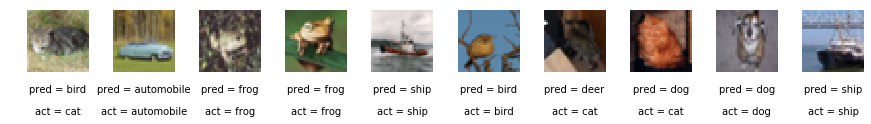

In [9]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(predictions_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actuals_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


## Architecture - Embelish with Dropout and Batch Normalization

In [10]:
input_layer = Input(shape=(32, 32, 3))

x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=(3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation("softmax")(x)

model = Model(input_layer, output_layer)

In [11]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0   

### Train

In [12]:
optimizer = Adam(lr=.0005)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [13]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=50,
          shuffle=True,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.5455 - accuracy: 0.4580 - val_loss: 1.4407 - val_accuracy: 0.4998
Epoch 2/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.1476 - accuracy: 0.5951 - val_loss: 1.2269 - val_accuracy: 0.5806
Epoch 3/50
50000/50000 [==============================] - 14s 281us/step - loss: 0.9919 - accuracy: 0.6544 - val_loss: 1.0629 - val_accuracy: 0.6247
Epoch 4/50
50000/50000 [==============================] - 14s 281us/step - loss: 0.9067 - accuracy: 0.6822 - val_loss: 1.0818 - val_accuracy: 0.6156
Epoch 5/50
50000/50000 [==============================] - 14s 283us/step - loss: 0.8440 - accuracy: 0.7050 - val_loss: 0.9524 - val_accuracy: 0.6719
Epoch 6/50
50000/50000 [==============================] - 15s 291us/step - loss: 0.7943 - accuracy: 0.7212 - val_loss: 0.9351 - val_accuracy: 0.6777
Epoch 7/50
50000/50000 [==============================] 

### Evaluate

In [16]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 1s 75us/step


[1.1742865085601806, 0.7245000004768372]

In [14]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

predictions = model.predict(x_test)

predictions_single = CLASSES[np.argmax(predictions, axis=-1)]
actuals_single = CLASSES[np.argmax(y_test, axis=-1)]

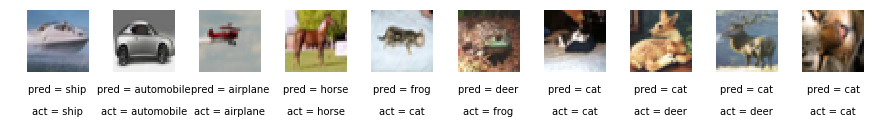

In [15]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(predictions_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actuals_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)